In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2797,6023-YEBUP,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Yes
6044,1689-YQBYY,Female,0,No,Yes,12,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.60,893,No
962,9489-UTFKA,Male,1,Yes,No,8,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),60.90,551.95,No
2278,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,No
1375,1839-FBNFR,Female,0,Yes,Yes,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.85,854.8,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [85]:
#if we keep errors='coerce', it will ignore the errors (  Converts all values of string to numeric and where there is null it will ignore)

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
#findding the datas where NULL value is TRUE in Totalcharges

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Removing the null values data

In [9]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\koshi\AppData\Local\Temp\ipykernel_10068\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

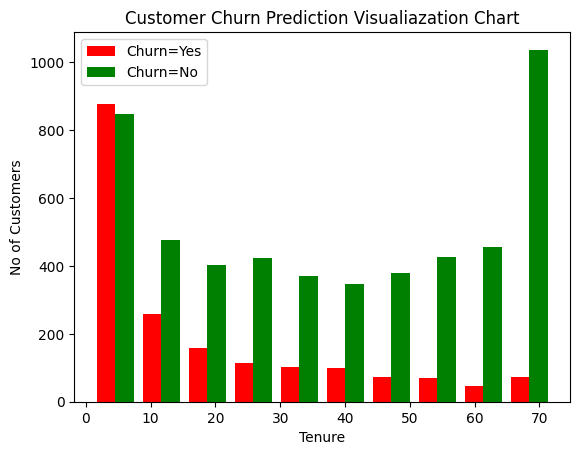

In [12]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("No of Customers")
plt.title("Customer Churn Prediction Visualiazation Chart")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

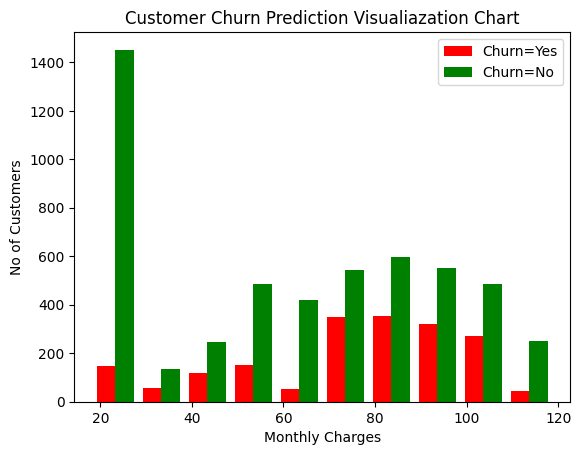

In [13]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("No of Customers")
plt.title("Customer Churn Prediction Visualiazation Chart")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [15]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [16]:
df1=df1.replace('No internet service','No')
df1=df1.replace('No phone service','No')



In [17]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [18]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1 , 'No' : 0}, inplace=True)

In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
 df1['gender'].replace({'Female' : 1 , 'Male' : 0}, inplace=True)

In [21]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
#One hot encoding

In [23]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2 = df2.astype(int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.dtypes

gender                                     int32
SeniorCitizen                              int32
Partner                                    int32
Dependents                                 int32
tenure                                     int32
PhoneService                               int32
MultipleLines                              int32
OnlineSecurity                             int32
OnlineBackup                               int32
DeviceProtection                           int32
TechSupport                                int32
StreamingTV                                int32
StreamingMovies                            int32
PaperlessBilling                           int32
MonthlyCharges                             int32
TotalCharges                               int32
Churn                                      int32
InternetService_DSL                        int32
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_Month-to-mo

In [25]:
#Scaling the datas in the range of 0 to 1

In [26]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [27]:
X=df2.drop('Churn',axis='columns')  #all the columns except Churn
y=df2['Churn']                        # Churn column

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
X_train.shape

(5625, 26)

In [30]:
len(X_train.columns)

26

In [31]:
X_test.shape

(1407, 26)

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
     keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.7708
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4221 - accuracy: 0.7977
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8037
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8075
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8096
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8110
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4010 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3487 - accuracy: 0.8379
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8338
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8386
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8373
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8395
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8416
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8389
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8366
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8405
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3428 - accuracy: 

In [33]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7662


[0.4953932464122772, 0.7661691308021545]

In [34]:
yp=model.predict(X_test)


44/44 [==============================] - 0s 1ms/step


In [35]:
y_pred = []
for e in yp:
    if e>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int32

In [37]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [38]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

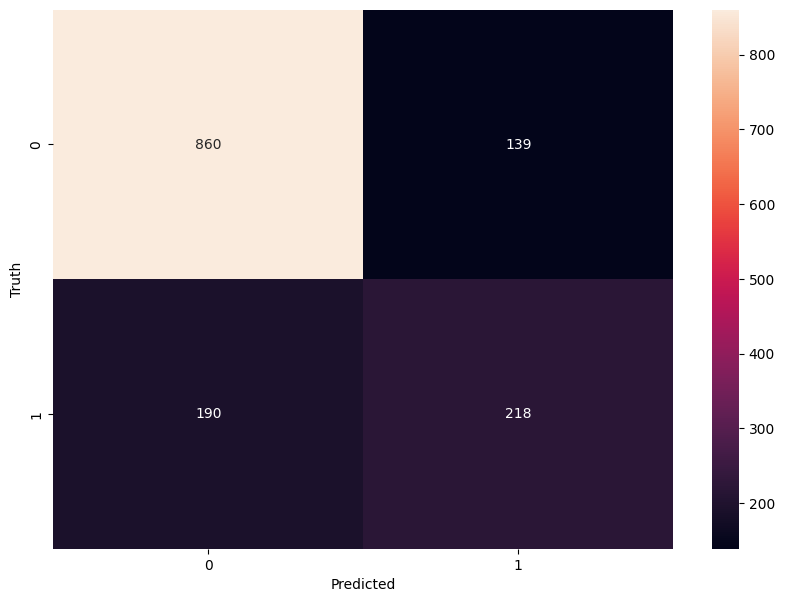

In [39]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')